In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.style.use('dark_background')

In [7]:
import cv2
import skimage
from skimage import color, exposure, filters

# Load and display image

(1200, 1798, 3)


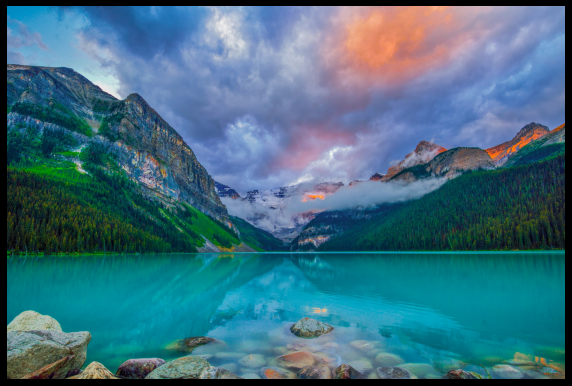

In [30]:
image_path = '../../../Data/Random Images/LakeLouise.jpg'
#image_path = '../../../Data/Random Images/Bolognese.png'
#image_path = '../../../Data/Random Images/QuantumBookPage.jpg'

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)

plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')
plt.show()

# Resize the image

(333, 500, 3)


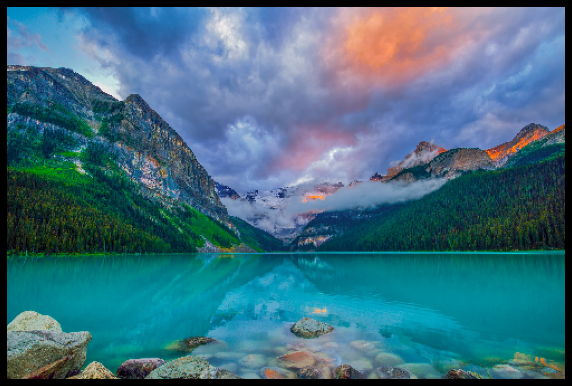

In [31]:
# Resize while preserving aspect ratio
target_width = 500
h, w = image.shape[:2]
aspect_ratio = h / w
target_height = int(target_width * aspect_ratio)

image = cv2.resize(image, (target_width, target_height))
print(image.shape)

plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')
plt.show()

# Convert image to grayscale

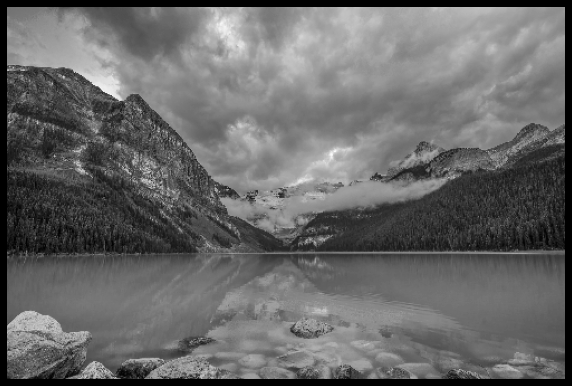

In [50]:
image_gray = color.rgb2gray(image)

if image_gray.dtype != np.uint8:
    image_gray = (image_gray * 255).astype(np.uint8)

plt.figure(figsize=(10,10))
plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.show()

# Change contrast with gamma

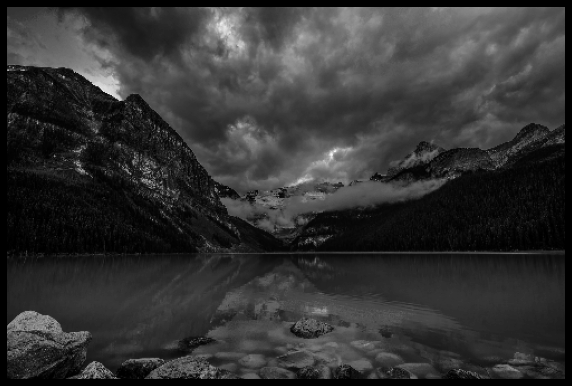

In [52]:
# normalize
#image_gray_gamme = image_gray / 255
image_gray_gamme = image_gray / image_gray.max()

gamma = 2.0

image_gray_gamme = image_gray_gamme ** gamma

plt.figure(figsize=(10,10))
plt.imshow(image_gray_gamme, cmap='gray')
plt.axis('off')
plt.show()

# Get RGB and HSV histograms

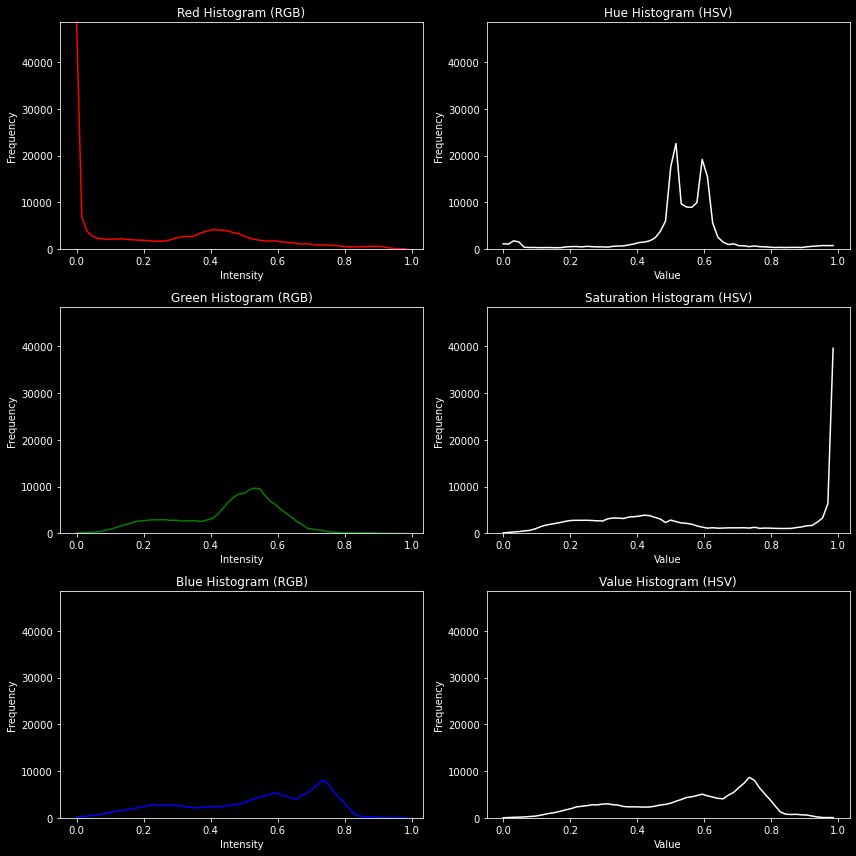

In [33]:
image_float = image.astype(np.float32) / 255.0

bins = 256 // 4

# ---------------------------
# Compute Histograms for RGB
# ---------------------------
r_hist, r_bins = np.histogram(image_float[:, :, 0], bins=bins, range=(0, 1))
g_hist, g_bins = np.histogram(image_float[:, :, 1], bins=bins, range=(0, 1))
b_hist, b_bins = np.histogram(image_float[:, :, 2], bins=bins, range=(0, 1))

# ---------------------------
# Convert Image to HSV and Compute Histograms
# ---------------------------
image_float_hsd = color.rgb2hsv(image_float)

h_hist, h_bins = np.histogram(image_float_hsd[:, :, 0], bins=bins, range=(0, 1))
s_hist, s_bins = np.histogram(image_float_hsd[:, :, 1], bins=bins, range=(0, 1))
v_hist, v_bins = np.histogram(image_float_hsd[:, :, 2], bins=bins, range=(0, 1))

# Compute the maximum frequency across all histograms for a uniform y-limit
max_val = max(np.max(r_hist), np.max(g_hist), np.max(b_hist),
              np.max(h_hist), np.max(s_hist), np.max(v_hist))

# ---------------------------
# Plotting: 3 rows x 2 columns (each channel on a separate subplot)
# ---------------------------
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Row 1: Red (RGB) and Hue (HSV)
axes[0, 0].plot(r_bins[:-1], r_hist, color='r')
axes[0, 0].set_title('Red Histogram (RGB)')
axes[0, 0].set_xlabel('Intensity')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_ylim(0, max_val)

axes[0, 1].plot(h_bins[:-1], h_hist, color='w')
axes[0, 1].set_title('Hue Histogram (HSV)')
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_ylim(0, max_val)

# Row 2: Green (RGB) and Saturation (HSV)
axes[1, 0].plot(g_bins[:-1], g_hist, color='g')
axes[1, 0].set_title('Green Histogram (RGB)')
axes[1, 0].set_xlabel('Intensity')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_ylim(0, max_val)

axes[1, 1].plot(s_bins[:-1], s_hist, color='w')
axes[1, 1].set_title('Saturation Histogram (HSV)')
axes[1, 1].set_xlabel('Value')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_ylim(0, max_val)

# Row 3: Blue (RGB) and Value (HSV)
axes[2, 0].plot(b_bins[:-1], b_hist, color='b')
axes[2, 0].set_title('Blue Histogram (RGB)')
axes[2, 0].set_xlabel('Intensity')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].set_ylim(0, max_val)

axes[2, 1].plot(v_bins[:-1], v_hist, color='w')
axes[2, 1].set_title('Value Histogram (HSV)')
axes[2, 1].set_xlabel('Value')
axes[2, 1].set_ylabel('Frequency')
axes[2, 1].set_ylim(0, max_val)

plt.tight_layout()
plt.show()

# Edge detection w/ Sobel filter

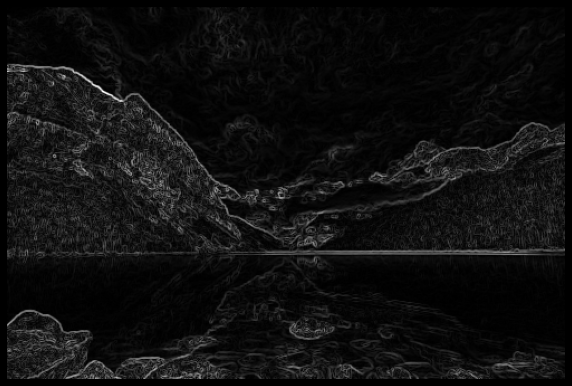

In [34]:
edges = filters.sobel(image_gray)

plt.figure(figsize=(10,10))
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

# Apply Gaussian blurs

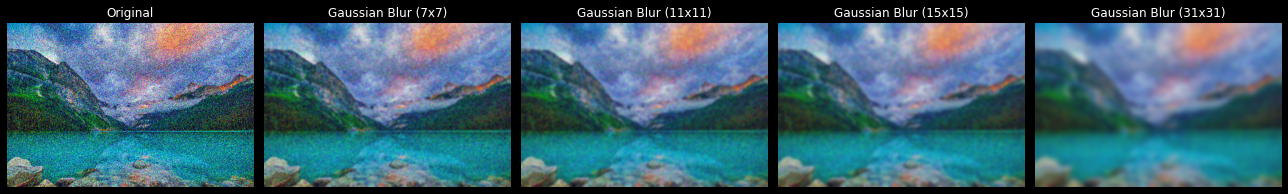

In [35]:
# Add noise to the image
noise = np.random.normal(loc=0, scale=50, size=image.shape)
noisy_image = image.astype(float) + noise.astype(np.int16)
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

# Define a list of kernel sizes for Gaussian blurring (they must be odd numbers)
kernel_sizes = [7, 11, 15, 31]

# Total number of subplots (1 for original + one for each blurred image)
num_subplots = len(kernel_sizes) + 1

plt.figure(figsize=(18, 6))

# Display the original image
plt.subplot(1, num_subplots, 1)
plt.imshow(noisy_image)
plt.title("Original")
plt.axis("off")

# Apply Gaussian blur for each kernel size and plot the result
for idx, k in enumerate(kernel_sizes, start=2):
    blurred = cv2.GaussianBlur(noisy_image, (k, k), 0)
    plt.subplot(1, num_subplots, idx)
    plt.imshow(blurred)
    plt.title(f"Gaussian Blur ({k}x{k})")
    plt.axis("off")
# end
plt.tight_layout()
plt.show()

# Apply median blur

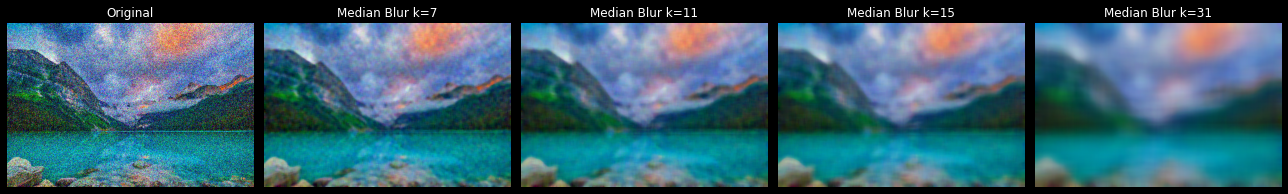

In [36]:
# Add noise to the image
noise = np.random.normal(loc=0, scale=50, size=image.shape)
noisy_image = image.astype(float) + noise.astype(np.int16)
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

# Define a list of kernel sizes for median blurring (must be odd numbers)
kernel_sizes = [7, 11, 15, 31]

# Total number of subplots (1 for original + one for each blurred image)
num_subplots = len(kernel_sizes) + 1

plt.figure(figsize=(18, 6))

# Display the original image (convert BGR to RGB for display if necessary)
plt.subplot(1, num_subplots, 1)
plt.imshow(noisy_image)
plt.title("Original")
plt.axis("off")

# Apply median blur for each kernel size and plot the result
for idx, k in enumerate(kernel_sizes, start=2):
    blurred = cv2.medianBlur(noisy_image, k)
    plt.subplot(1, num_subplots, idx)
    plt.imshow(blurred)
    plt.title(f"Median Blur k={k}")
    plt.axis("off")
# end
plt.tight_layout()
plt.show()

# Image thresholding

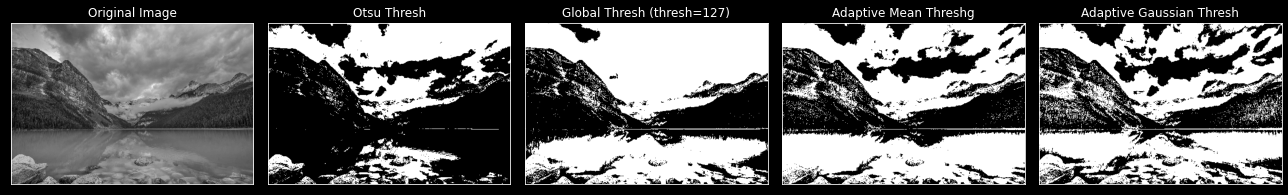

In [53]:
thresh = 127

kernel_size = 201

# Global thresholding (fixed threshold at 127)
ret1, th1 = cv2.threshold(image_gray, thresh, 255, cv2.THRESH_BINARY)

# Otsu Thresholding
ret2, th2 = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Adaptive Mean Thresholding
th3 = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, kernel_size, 2)

# Adaptive Gaussian Thresholding
th4 = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, kernel_size, 2)

# Titles and images list
titles = [
    'Original Image', 
    'Otsu Thresh',
    f'Global Thresh (thresh={thresh})', 
    'Adaptive Mean Threshg', 
    'Adaptive Gaussian Thresh', 
]
images = [image_gray, th1, th2, th3, th4]

# Create 5 horizontal subplots
plt.figure(figsize=(18, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
# end
plt.tight_layout()
plt.show()

# Apply a custom kernel to a grayscale image

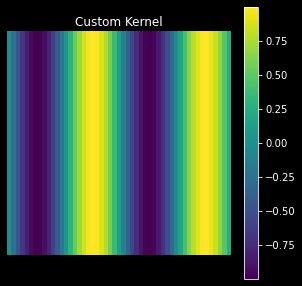

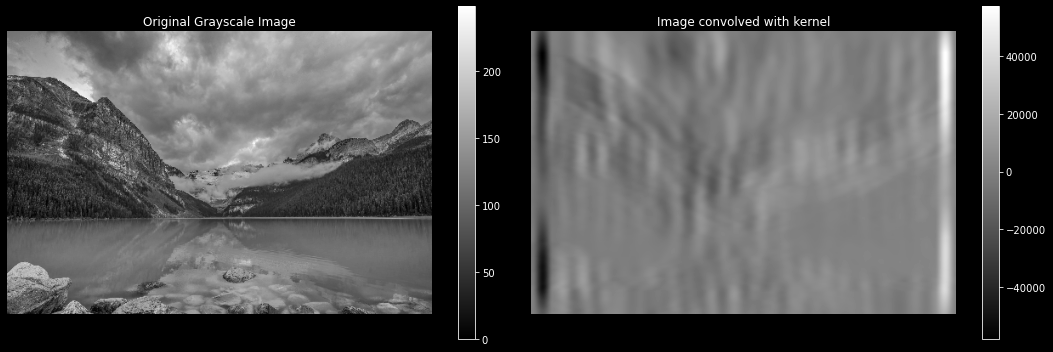

In [102]:
from scipy.signal import convolve2d

# Define the kernel size k (for example, 5x5)
k = 51

# Create a custom kernel of size k x k.
# For example, here we create a uniform averaging kernel:
kernel = np.ones((k, k))
kernel = kernel / kernel.sum()

kernel = np.diag( [1]*k )
kernel = kernel / kernel.sum()

kernel = np.random.rand(k,k)
kernel = kernel / kernel.sum()

kernel = np.random.randn(k,k)

freq = 2
kernel = -np.repeat( np.sin( 2 * np.pi * freq * np.arange(k) / k ), k ).reshape(k,k).T

plt.figure(figsize=(5, 5))
im = plt.imshow(kernel, interpolation='none', cmap='viridis')
plt.title("Custom Kernel")
plt.colorbar(im)
plt.axis('off')
plt.show()

# Apply the kernel to image_gray using zero padding.
# Using scipy.signal.convolve2d: mode='same' returns an output the same size as input,
# and boundary='fill' with fillvalue=0 applies zero padding.
convolved_image = convolve2d(image_gray, kernel, mode='same', boundary='fill', fillvalue=0)

# Plot the original and convolved images
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
im2 = plt.imshow(image_gray, cmap='gray')
plt.colorbar(im2)
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
im3 = plt.imshow(convolved_image, cmap='gray')
plt.colorbar(im3)
plt.title('Image convolved with kernel')
plt.axis('off')

plt.tight_layout()
plt.show()